In [1]:
from multiprocessing import Pool

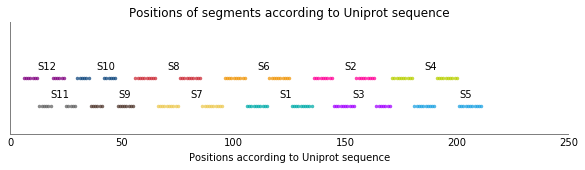

1886 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


In [6]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks11'
image_counter = Counter()

### Writing

In [3]:
lowest_acceptable_fitness = 0.8 * wt_fitness
minimal_N = 20

folder_for_hdfs = check_dir(os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds'))
folder_for_images = check_dir(os.path.join(figures_folder, 'impacts_of_mutations_in_all_backgrounds'))

In [5]:
def save_fitness_impacts(data_mutation__tuple):
    data_subset, mutation = data_mutation__tuple
    impacts = get_fitness_impacts_in_all_backgrounds(data_subset, mutation, lowest_acceptable_fitness=lowest_acceptable_fitness)
    if len(impacts) < minimal_N:
        return None
    impacts = pd.to_numeric(impacts)
    hdf_filename = os.path.join(folder_for_segment_hdfs, 'impacts_of_mutation_%s.hdf' %(mutation))
    impacts.to_hdf(hdf_filename, 'data')

    title = 'Impact of mutation %s in various backgrounds' %(mutation)
    plot_better()
    plt.hist(impacts.values, range=(-1.2, 1.2), bins=120, edgecolor='none', color='magenta');
    plt.title(title + '\nN = %s' %len(impacts))
    plt.xlim(-1.2,1.2)
    plt.xlabel(u'fitness of mutant  \u2013  fitness of background')
    plt.ylabel('Number of mutants')
    plt.axvline(0, color='gray')
    
    plt.tight_layout()
    save_image_simply(title, folder_for_segment_images)
    plt.close()


needed = True
if needed:
    f = FloatProgress(min=0, max=len(data.keys()))
    display(f)
    for segment in data:        
        data_subset = data[segment].copy() 
        mutations = list(set(':'.join(data_subset.dropna(subset=['mut_list_Scer']).mut_list_Scer.values).split(':')))
        mutations = sorted(list(mutations), key=lambda m: int(m[:-1]))
        data_subset['mut_list_Scer'].fillna('', inplace=True)
        data_subset['wt'] = data_subset['mut_list_Scer']
        folder_for_segment_images = check_dir(os.path.join(folder_for_images, segment.split('_')[0], ''))
        folder_for_segment_hdfs = check_dir(os.path.join(folder_for_hdfs, segment.split('_')[0], ''))
        
        for mutation in mutations:
            save_fitness_impacts((data_subset, mutation))

        f.value += 1
        print segment, '%s unique mutations' % len(mutations)

S1_scaled 215 unique mutations
S2_scaled 184 unique mutations
S3_scaled 161 unique mutations
S4_scaled 148 unique mutations
S5_scaled 203 unique mutations
S6_scaled 189 unique mutations
S7_scaled 158 unique mutations
S8_scaled 167 unique mutations
S9_scaled 102 unique mutations
S10_scaled 137 unique mutations
S11_scaled 92 unique mutations
S12_scaled 130 unique mutations


### Reading

In [ ]:
# def read_impacts_in_all_backgrounds(path_to_folder=None):
    if not path_to_folder:
        path_to_folder = os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds__full_lib', '')
        print 'Since path to folder with hdfs was not provided, this is the path that will be used:\n%s' %path_to_folder

    files = [f for f in os.listdir(path_to_folder)]
    fit_dict = OrderedDict()

    for segment in data:
        data_subset = data[segment].copy() 
        mutations = list(set(':'.join(data_subset.dropna(subset=['mut_list_Scer']).mut_list_Scer.values).split(':')))
        mutations = sorted(list(mutations), key=lambda m: int(m[:-1]))
        fit_dict[segment] = {}
        for mutation in mutations:
            fn = 'segment_%s__impacts_of_mutation_%s.hdf' %(segment.split('_')[0], mutation)
            if fn in files:
                fit_dict[segment][get_full_mutation(mutation)] = pd.read_hdf(path_to_folder + fn)
    return fit_dict

fit_dict = read_impacts_in_all_backgrounds(path_to_folder=folder_for_hdfs)

### Top

In [60]:
summary = {}
for segment in fit_dict:
    for mutation in fit_dict[segment]:
        summary[mutation] = {}
        summary[mutation]['number_of_backgrounds'] = fit_dict[segment][mutation].size
        summary[mutation]['median_fitness'] = fit_dict[segment][mutation].median()

In [67]:
fitness_summary = pd.DataFrame.from_dict(summary, orient='index')
fitness_summary = fitness_summary[~np.isnan(fitness_summary['median_fitness'])]
fitness_summary.sort_values(['median_fitness', 'number_of_backgrounds'], ascending=False, inplace=True)
fitness_summary[fitness_summary['number_of_backgrounds'] > 15]

,median_fitness,number_of_backgrounds
E150K,0.023771,19
S50I,0.023082,26
G208Q,0.021121,18
A110S,0.020224,20
T48R,0.016084,27
E202K,0.015129,24
K151R,0.014702,24
L147M,0.014067,48
E169L,0.013032,115
P36K,0.012651,22


### Plots

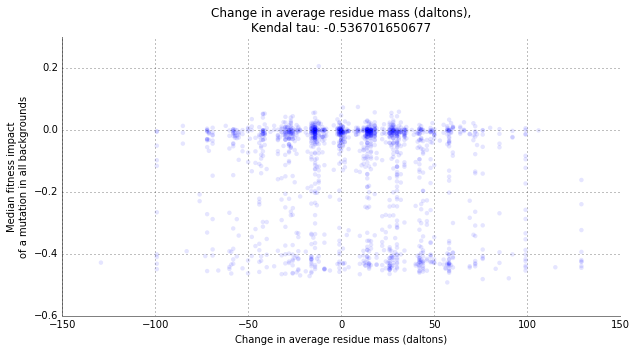

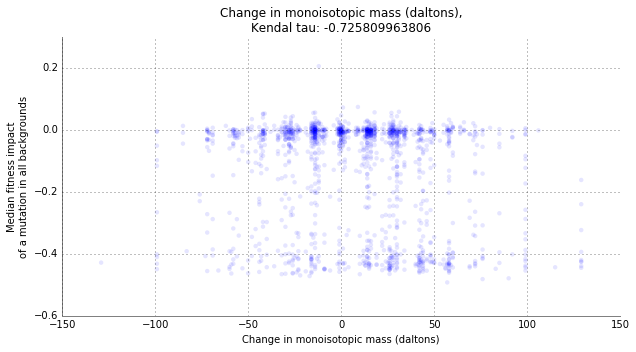

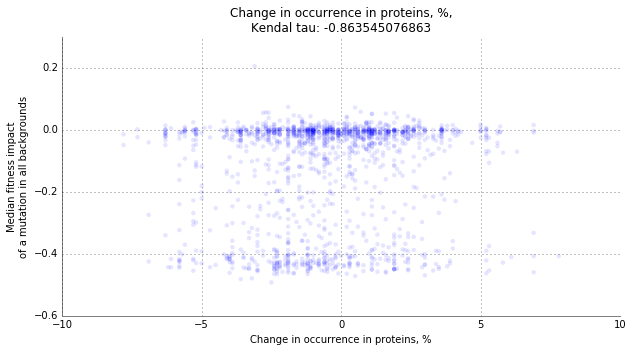

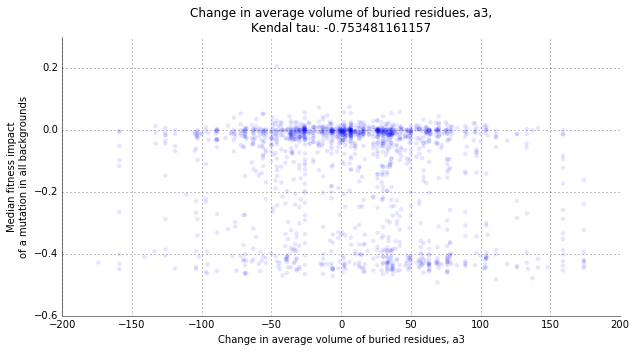

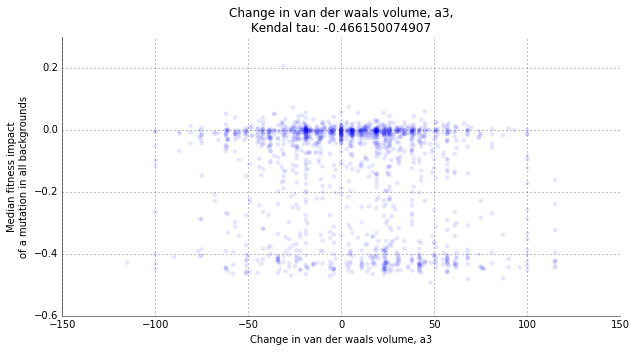

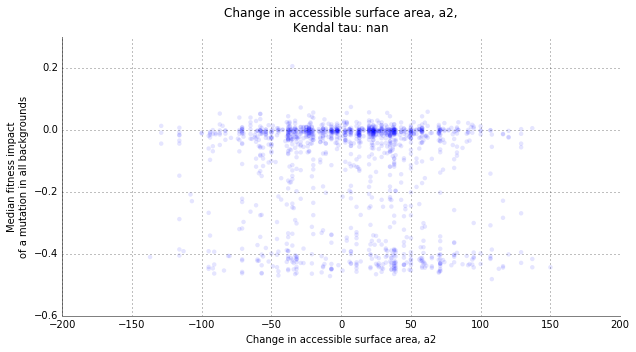

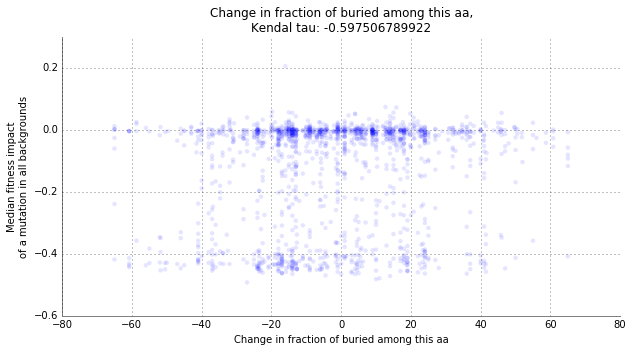

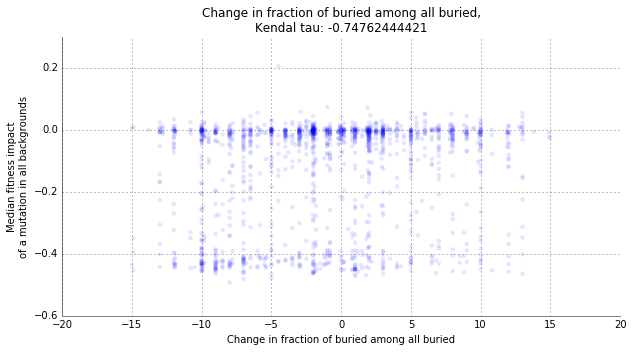

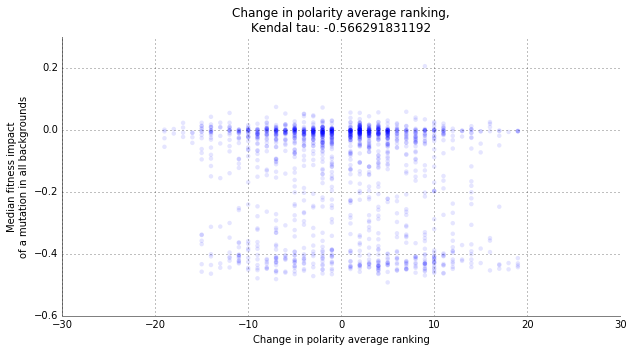

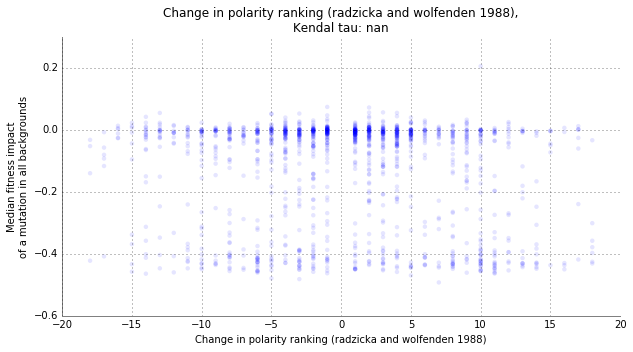

In [27]:
for aa_property in quantitative_properties:
    title = 'Fitness impact of mutations in all backgrounds vs. %s' %aa_property
    plot_better()
    to_correlate = {'x':[], 'y':[]}
    for segment in fit_dict:
        for mutation in fit_dict[segment]:
            x, y = aa_property_change(mutation, aa_property), fit_dict[segment][mutation].median()
            plt.scatter(x,y,
                        edgecolor='none', alpha=0.1)
            to_correlate['x'].append(x)
            to_correlate['y'].append(y)
    plt.xlabel('Change in %s' %(aa_property.lower()))
    plt.ylabel('Median fitness impact\nof a mutation in all backgrounds')
    correlation = stats.kendalltau(to_correlate['x'], to_correlate['y'])
    plt.title('Change in %s,\nKendal tau: %s' %(aa_property.lower(), correlation[0]))
    save_image(image_counter, title, figures_folder, notebook_prefix)